# Detection theory

In [52]:
import numpy as np

import matplotlib.pyplot as plt
#from matplotlib import cm
%matplotlib inline
plt.rcParams['font.size'] = '12'

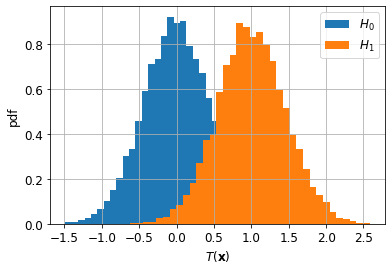

In [96]:
# Generando muestras de señal con DC o sin DC
M = 10000
N = 10
A = 1
sigma2 = 2
gamma = 1

sigma = np.sqrt(sigma2)
# Señal con DC
x1 = A + sigma*np.random.randn(M,N)
# Detector de señal con DC
T1 = np.mean(x1,axis=1)

# Señal sin DC
x0 = sigma*np.random.randn(M,N)
# Detector de señal sin DC
T0 = np.mean(x0,axis=1)

plt.figure()
plt.hist(T0,bins=40,density=True)
plt.hist(T1,bins=40,density=True)
plt.grid('on')
plt.xlabel('$T(\mathbf{x})$')
plt.ylabel('pdf')
plt.legend(['$H_0$','$H_1$'])



[[9872.  128.]
 [4988. 5012.]]


Text(0, 0.5, 'True')

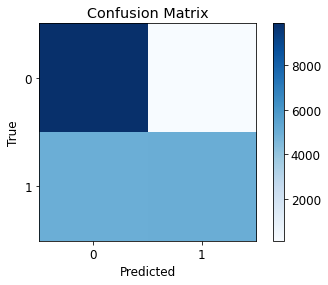

In [97]:
conf_matrix = np.zeros([2,2])

# Verdaderos negativos
conf_matrix[0,0] = np.sum(T0<gamma)
# Falsos positivos (Falsa alarma)
conf_matrix[0,1] = np.sum(T0>=gamma)
# Falsos negativos (Detección fallida)
conf_matrix[1,0] = np.sum(T1<gamma)
# Verdadero positivos (Detección correcta)
conf_matrix[1,1] = np.sum(T1>=gamma)
print(conf_matrix)

plt.figure()
plt.imshow(conf_matrix,cmap=plt.cm.Blues)
plt.xticks([0,1])
plt.yticks([0,1])
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

Text(0, 0.5, 'Prob of detection')

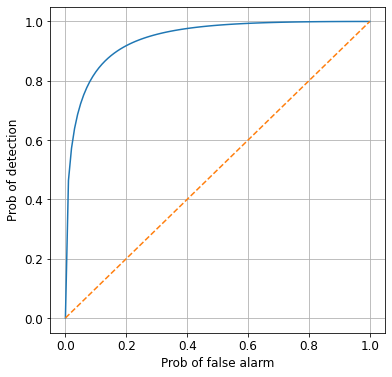

In [98]:
# Graficando ROC

import scipy.stats as stats

P_FA = np.linspace(0,1,101)
T = stats.norm.isf(P_FA,loc=0,scale=1)

P_D = stats.norm.sf(T-np.sqrt(N*A**2/sigma2),loc=0,scale=1)

plt.figure(figsize=[6,6])
plt.plot(P_FA,P_D)
plt.plot(P_FA,P_FA,'--')
plt.grid('on')
plt.xlabel('Prob of false alarm')
plt.ylabel('Prob of detection')


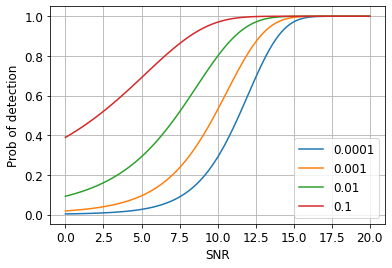

In [104]:
# Coeficiente de discriminación

plt.figure()

P_FA = 10.**np.array([-4,-3,-2,-1])
SNRdB = np.linspace(0,20,101)

for alpha in P_FA:
    SNR = 10**(SNRdB/10)
    T = stats.norm.isf(alpha,loc=0,scale=1)
    P_D = stats.norm.sf(T-np.sqrt(SNR),loc=0,scale=1)
    plt.plot(SNRdB,P_D)

plt.grid('on')
plt.xlabel('SNR')
plt.ylabel('Prob of detection')
plt.legend(P_FA)